In [ ]:
import sys
!{sys.executable} -m pip install spotipy

In [1]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import math
import warnings
import time
warnings.simplefilter("ignore")

In [2]:
sp = spotipy.Spotify()

USER_ID = "emilyrlandman"
TOP10_PLAYLIST_ID = "1ggWDL88pSeijtf7zifvF1"
ALBUMS_PLAYLIST_ID = "5YVVRDq8QLSB2wJ2lvq3Dx"
CLIENT_ID = "27a2df6fdb064b40b952dbe55f451421" 
CLIENT_SECRET = "a97bf4bf619b4239961eb80513e2c0e0" 
CLIENT_CREDENTIALS = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET) 

sp = spotipy.Spotify(client_credentials_manager=CLIENT_CREDENTIALS) 
sp.trace=False

In [3]:
# First we have to gather the total number of tracks in the playlist 
track_count = sp.user_playlist_tracks(USER_ID, TOP10_PLAYLIST_ID, 'total')['total']

# Then we calculate the number of times we'll have to call the API
iterations = math.ceil(track_count/100)

# Finally we begin our loop
attributes_df = pd.DataFrame()
information_df = pd.DataFrame()
for i in range(iterations):
    playlist = sp.user_playlist_tracks(USER_ID, TOP10_PLAYLIST_ID, None, None, i*100) # documentation - https://spotipy.readthedocs.io/en/2.13.0/
    songs = playlist["items"]
#     time.sleep(1) # incase this is necessary on larger playlists

    track_ids = []
    track_names = []
    track_popularities = []
    track_explicit = []
    artist_ids = []
    artist_names = []
    artist_popularities = []
    artist_followers = []
    artist_genres = []
    
    for j in range(len(songs)): 
        track_ids.append(songs[j]["track"]["id"])
        track_names.append(songs[j]["track"]["name"])
        track_popularities.append(songs[j]["track"]["popularity"])
        track_explicit.append(songs[j]["track"]["explicit"])
        artist_names.append(songs[j]["track"]["artists"][0]["name"])
        
        artist_id = songs[j]["track"]["artists"][0]["id"]
        artist_ids.append(artist_id)
        artist = sp.artist(artist_id)
        artist_popularities.append(artist['popularity'])
        artist_followers.append(artist['followers']['total'])
        artist_genres.append(artist['genres'])

        
    features = sp.audio_features(track_ids)
    att_df = pd.DataFrame(features)
    info_df = pd.DataFrame({"song_id":track_ids, 
                            "song_name":track_names, 
                            "song_popularity":track_popularities,
                            "explicit":track_explicit,
                            "artist_id":artist_ids, 
                            "artist": artist_names, 
                            "artist popularity": artist_popularities,
                            "artist followers": artist_followers,
                            "genre": artist_genres})
    
    attributes_df = attributes_df.append(att_df, ignore_index=True)
    information_df = information_df.append(info_df, ignore_index=True)

TOP_df = information_df.merge(attributes_df, left_on="song_id", right_on="id")
TOP_df = TOP_df.drop_duplicates(['song_id'])
TOP_df.reset_index(inplace=True, drop=True)
TOP_df["top_10"] = 1
# TOP_df

In [4]:
# First we have to gather the total number of tracks in the playlist 
track_count = sp.user_playlist_tracks(USER_ID, ALBUMS_PLAYLIST_ID, 'total')['total']

# Then we calculate the number of times we'll have to call the API
iterations = math.ceil(track_count/100)

# Finally we begin our loop
attributes_df = pd.DataFrame()
information_df = pd.DataFrame()
for i in range(iterations):
    playlist = sp.user_playlist_tracks(USER_ID, ALBUMS_PLAYLIST_ID, None, None, i*100) # documentation - https://spotipy.readthedocs.io/en/2.13.0/
    songs = playlist["items"]
#     time.sleep(1) # incase this is necessary on larger playlists

    track_ids = []
    track_names = []
    track_popularities = []
    track_explicit = []
    artist_ids = []
    artist_names = []
    artist_popularities = []
    artist_followers = []
    artist_genres = []
    
    for j in range(len(songs)): 
        track_ids.append(songs[j]["track"]["id"])
        track_names.append(songs[j]["track"]["name"])
        track_popularities.append(songs[j]["track"]["popularity"])
        track_explicit.append(songs[j]["track"]["explicit"])
        artist_names.append(songs[j]["track"]["artists"][0]["name"])
        
        artist_id = songs[j]["track"]["artists"][0]["id"]
        artist_ids.append(artist_id)
        artist = sp.artist(artist_id)
        artist_popularities.append(artist['popularity'])
        artist_followers.append(artist['followers']['total'])
        artist_genres.append(artist['genres'])

        
    features = sp.audio_features(track_ids)
    att_df = pd.DataFrame(features)
    info_df = pd.DataFrame({"song_id":track_ids, 
                            "song_name":track_names, 
                            "song_popularity":track_popularities,
                            "explicit":track_explicit,
                            "artist_id":artist_ids, 
                            "artist": artist_names, 
                            "artist popularity": artist_popularities,
                            "artist followers": artist_followers,
                            "genre": artist_genres})
    
    attributes_df = attributes_df.append(att_df, ignore_index=True)
    information_df = information_df.append(info_df, ignore_index=True)
    
ALBUMS_df = information_df.merge(attributes_df, left_on="song_id", right_on="id")
ALBUMS_df["top_10"] = 0
# ALBUMS_df

In [5]:
FULL_df = TOP_df.append(ALBUMS_df, ignore_index=True)
# FULL_df

In [6]:
FULL_df.drop_duplicates(["song_id"], inplace=True)
FULL_df.reset_index(inplace=True, drop=True)
FULL_df

,song_id,song_name,song_popularity,explicit,artist_id,artist,artist popularity,artist followers,genre,danceability,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,top_10
0,3y4LxiYMgDl4RethdzpmNe,Breathe,65,False,25NQNriVT2YbSW80ILRWJa,Faith Hill,67,1134712,"[contemporary country, country, country dawn, ...",0.529,...,0.278,136.859,audio_features,3y4LxiYMgDl4RethdzpmNe,spotify:track:3y4LxiYMgDl4RethdzpmNe,https://api.spotify.com/v1/tracks/3y4LxiYMgDl4...,https://api.spotify.com/v1/audio-analysis/3y4L...,250547,4,1
1,3i3GeK0qLQybu4ah42YmCY,Smooth (feat. Rob Thomas),54,False,6GI52t8N5F02MxU0g5U69P,Santana,74,1614693,"[blues rock, classic rock, mexican classic roc...",0.612,...,0.960,115.953,audio_features,3i3GeK0qLQybu4ah42YmCY,spotify:track:3i3GeK0qLQybu4ah42YmCY,https://api.spotify.com/v1/tracks/3i3GeK0qLQyb...,https://api.spotify.com/v1/audio-analysis/3i3G...,295987,4,1
2,3fucYASejkSMwtAYjFRKlF,Maria Maria (feat. The Product G&B),53,False,6GI52t8N5F02MxU0g5U69P,Santana,74,1614693,"[blues rock, classic rock, mexican classic roc...",0.779,...,0.663,97.927,audio_features,3fucYASejkSMwtAYjFRKlF,spotify:track:3fucYASejkSMwtAYjFRKlF,https://api.spotify.com/v1/tracks/3fucYASejkSM...,https://api.spotify.com/v1/audio-analysis/3fuc...,262160,4,1
3,6ctr1K7KzKErxbfGAynL8A,I Wanna Know,57,False,3zTOe1BtyTkwNvYZOxXktX,Joe,67,1038792,"[dance pop, hip pop, neo soul, new jack swing,...",0.724,...,0.581,136.057,audio_features,6ctr1K7KzKErxbfGAynL8A,spotify:track:6ctr1K7KzKErxbfGAynL8A,https://api.spotify.com/v1/tracks/6ctr1K7KzKEr...,https://api.spotify.com/v1/audio-analysis/6ctr...,296800,4,1
4,4cKGldbhGJniI8BrB3K6tb,Everything You Want,64,False,6Hizgjo92FnMp8wGaRUNTn,Vertical Horizon,56,280175,"[neo mellow, pop rock, post-grunge]",0.637,...,0.741,93.898,audio_features,4cKGldbhGJniI8BrB3K6tb,spotify:track:4cKGldbhGJniI8BrB3K6tb,https://api.spotify.com/v1/tracks/4cKGldbhGJni...,https://api.spotify.com/v1/audio-analysis/4cKG...,257067,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,6DPjPnAfdCO71OluEpmekE,Damn Girl - Demo,22,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1857217,"[modern rock, neo mellow, pop, pop punk, pop r...",0.720,...,0.864,100.006,audio_features,6DPjPnAfdCO71OluEpmekE,spotify:track:6DPjPnAfdCO71OluEpmekE,https://api.spotify.com/v1/tracks/6DPjPnAfdCO7...,https://api.spotify.com/v1/audio-analysis/6DPj...,216667,4,0
2300,0QfnkUVZAr5l1SeqG2EydN,Fallin' Apart - Demo,22,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1857217,"[modern rock, neo mellow, pop, pop punk, pop r...",0.806,...,0.850,126.013,audio_features,0QfnkUVZAr5l1SeqG2EydN,spotify:track:0QfnkUVZAr5l1SeqG2EydN,https://api.spotify.com/v1/tracks/0QfnkUVZAr5l...,https://api.spotify.com/v1/audio-analysis/0Qfn...,213613,4,0
2301,1E4YUBtVN43cAN6uNHLaRA,Mona Lisa (When The World Comes Down) - Demo,23,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1857217,"[modern rock, neo mellow, pop, pop punk, pop r...",0.634,...,0.457,135.950,audio_features,1E4YUBtVN43cAN6uNHLaRA,spotify:track:1E4YUBtVN43cAN6uNHLaRA,https://api.spotify.com/v1/tracks/1E4YUBtVN43c...,https://api.spotify.com/v1/audio-analysis/1E4Y...,163520,4,0
2302,6l7yKJVwS5pzPGIdyG7kGZ,Real World - Demo,23,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1857217,"[modern rock, neo mellow, pop, pop punk, pop r...",0.452,...,0.532,159.880,audio_features,6l7yKJVwS5pzPGIdyG7kGZ,spotify:track:6l7yKJVwS5pzPGIdyG7kGZ,https://api.spotify.com/v1/tracks/6l7yKJVwS5pz...,https://api.spotify.com/v1/audio-analysis/6l7y...,235067,4,0


In [34]:
allGenres = FULL_df["genre"].explode()
allGenres.value_counts().head(50)

pop                       1445
dance pop                 1173
pop rap                    592
post-teen pop              566
rap                        453
urban contemporary         443
pop rock                   441
r&b                        383
hip pop                    301
hip hop                    294
neo mellow                 264
southern hip hop           174
post-grunge                160
atl hip hop                148
neo soul                   123
trap                       123
electropop                 111
canadian pop               110
alternative metal           96
rock                        95
gangster rap                85
uk pop                      84
nu metal                    74
edm                         73
queens hip hop              69
modern rock                 66
south carolina hip hop      66
europop                     65
pop punk                    64
dirty south rap             64
contemporary country        63
talent show                 58
melodic 

In [23]:
#Adding columns for the most common genres

pop = [0]*len(FULL_df.index)
rock = [0]*len(FULL_df.index)
house = [0]*len(FULL_df.index)
jazz = [0]*len(FULL_df.index)
country = [0]*len(FULL_df.index)
rap = [0]*len(FULL_df.index)
hiphop = [0]*len(FULL_df.index)
rnb = [0]*len(FULL_df.index)
soul = [0]*len(FULL_df.index)
edm = [0]*len(FULL_df.index)

for i in range(len(FULL_df["genre"])):
    for item in FULL_df["genre"][i]:
        if "pop" in item:
            pop[i]=1
        if "rock" in item:
            rock[i]=1
        if "house" in item:
            house[i]=1
        if "jazz" in item:
            jazz[i]=1
        if "country" in item:
            country[i]=1
        if "rap" in item:
            rap[i]=1
        if ("hip" in item) or ("hop" in item):
            hiphop[i]=1
        if "r&b" in item:
            rnb[i]=1
        if "soul" in item:
            soul[i]=1
        if ("edm" in item) or ("eletro" in item):
            edm[i]=1
            
FULL_df["pop"] = pop
FULL_df["rock"] = rock
FULL_df["house"] = house
FULL_df["jazz"] = jazz
FULL_df["country"] = country
FULL_df["rap"] = rap
FULL_df["hiphop"] = hiphop
FULL_df["rnb"] = rnb
FULL_df["soul"] = soul
FULL_df["edm"] = edm

FULL_df

,song_id,song_name,song_popularity,explicit,artist_id,artist,artist popularity,artist followers,genre,danceability,...,pop,rock,house,jazz,country,rap,hiphop,rnb,soul,edm
0,3y4LxiYMgDl4RethdzpmNe,Breathe,65,False,25NQNriVT2YbSW80ILRWJa,Faith Hill,67,1134712,"[contemporary country, country, country dawn, ...",0.529,...,1,1,0,0,1,0,0,0,0,0
1,3i3GeK0qLQybu4ah42YmCY,Smooth (feat. Rob Thomas),54,False,6GI52t8N5F02MxU0g5U69P,Santana,74,1614693,"[blues rock, classic rock, mexican classic roc...",0.612,...,0,1,0,0,0,0,0,0,0,0
2,3fucYASejkSMwtAYjFRKlF,Maria Maria (feat. The Product G&B),53,False,6GI52t8N5F02MxU0g5U69P,Santana,74,1614693,"[blues rock, classic rock, mexican classic roc...",0.779,...,0,1,0,0,0,0,0,0,0,0
3,6ctr1K7KzKErxbfGAynL8A,I Wanna Know,57,False,3zTOe1BtyTkwNvYZOxXktX,Joe,67,1038792,"[dance pop, hip pop, neo soul, new jack swing,...",0.724,...,1,0,0,0,0,1,1,1,1,0
4,4cKGldbhGJniI8BrB3K6tb,Everything You Want,64,False,6Hizgjo92FnMp8wGaRUNTn,Vertical Horizon,56,280175,"[neo mellow, pop rock, post-grunge]",0.637,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,6DPjPnAfdCO71OluEpmekE,Damn Girl - Demo,22,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1857217,"[modern rock, neo mellow, pop, pop punk, pop r...",0.720,...,1,1,0,0,0,0,0,0,0,0
2300,0QfnkUVZAr5l1SeqG2EydN,Fallin' Apart - Demo,22,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1857217,"[modern rock, neo mellow, pop, pop punk, pop r...",0.806,...,1,1,0,0,0,0,0,0,0,0
2301,1E4YUBtVN43cAN6uNHLaRA,Mona Lisa (When The World Comes Down) - Demo,23,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1857217,"[modern rock, neo mellow, pop, pop punk, pop r...",0.634,...,1,1,0,0,0,0,0,0,0,0
2302,6l7yKJVwS5pzPGIdyG7kGZ,Real World - Demo,23,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1857217,"[modern rock, neo mellow, pop, pop punk, pop r...",0.452,...,1,1,0,0,0,0,0,0,0,0


In [24]:
FULL_df.columns

Index(['song_id', 'song_name', 'song_popularity', 'explicit', 'artist_id',
       'artist', 'artist popularity', 'artist followers', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'top_10', 'pop', 'rock', 'house', 'jazz', 'country',
       'rap', 'hiphop', 'rnb', 'soul', 'edm'],
      dtype='object')

In [25]:
#Set up data

# Assign X (data) and y (target)
X = FULL_df.drop(['song_id', 'song_name',
                  'artist_id', 'artist', 'genre', 
                  'type', 'id', 'uri', 'track_href', 'analysis_url',
                  'top_10'], axis=1)
# X = X.drop(['artist popularity', 'artist followers'], axis=1)
# X = X.drop(['song_popularity'], axis=1)


y = FULL_df['top_10']
print(X.shape, y.shape)

#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

(2304, 27) (2304,)


### Logistic Regression

Training Data Score: 0.34837962962962965
Testing Data Score: 0.3628472222222222

              precision    recall  f1-score   support

    negative       0.91      0.34      0.49       528
    positive       0.08      0.62      0.14        48

    accuracy                           0.36       576
   macro avg       0.49      0.48      0.32       576
weighted avg       0.84      0.36      0.46       576



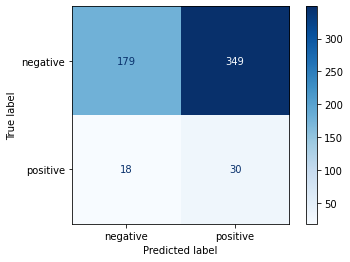

In [26]:
#create model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight = 'balanced')

#train model
classifier.fit(X_train, y_train)

#test model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}\n")

# Calculate classification report
target_names = ["negative", "positive"]
from sklearn.metrics import classification_report
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, display_labels=target_names)
plt.show()

### Logistic Regression pt 2

Training Data Score: 0.703125
Testing Data Score: 0.6770833333333334

              precision    recall  f1-score   support

    negative       0.97      0.66      0.79       528
    positive       0.18      0.81      0.30        48

    accuracy                           0.68       576
   macro avg       0.58      0.74      0.54       576
weighted avg       0.91      0.68      0.75       576



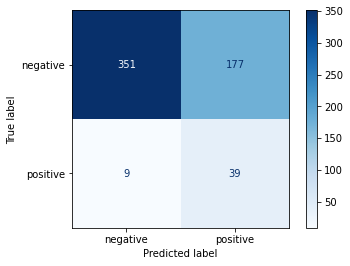

In [27]:
#optomizing the X
X_pop = X[['song_popularity']]
X_pop_train, X_pop_test, y_train, y_test = train_test_split(X_pop, y, random_state=42)

#train model
classifier.fit(X_pop_train, y_train)

#test model
print(f"Training Data Score: {classifier.score(X_pop_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_pop_test, y_test)}\n")

# Calculate classification report
target_names = ["negative", "positive"]
from sklearn.metrics import classification_report
predictions = classifier.predict(X_pop_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_pop_test, y_test, cmap=plt.cm.Blues, display_labels=target_names)
plt.show()

### Decision Tree

Training Data Score: 1.0
Testing Data Score: 0.9253472222222222

              precision    recall  f1-score   support

    negative       0.97      0.95      0.96       528
    positive       0.55      0.62      0.58        48

    accuracy                           0.93       576
   macro avg       0.76      0.79      0.77       576
weighted avg       0.93      0.93      0.93       576



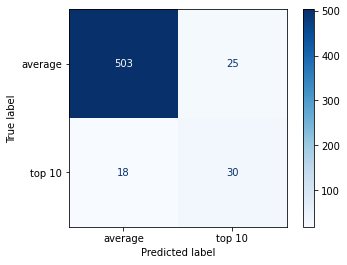

[(0.5259707316546101, 'song_popularity'),
 (0.08257538348756294, 'artist followers'),
 (0.06358520388823245, 'danceability'),
 (0.06258688770958004, 'speechiness'),
 (0.04439303694754756, 'energy'),
 (0.03461600705131955, 'liveness'),
 (0.03099303449882052, 'loudness'),
 (0.024284921276438432, 'tempo'),
 (0.023253119713014987, 'acousticness'),
 (0.02306787212812288, 'duration_ms'),
 (0.022156515187585664, 'valence'),
 (0.016545333025264706, 'instrumentalness'),
 (0.01269048219670832, 'artist popularity'),
 (0.011754225673341995, 'pop'),
 (0.010045975805350741, 'key'),
 (0.006106584878459023, 'rap'),
 (0.0023194675063302923, 'time_signature'),
 (0.0012290045063497797, 'house'),
 (0.001210287443267818, 'mode'),
 (0.0006159254220919026, 'explicit'),
 (1.5497440984824498e-16, 'soul'),
 (6.764272732815112e-17, 'rock'),
 (3.097641920323649e-17, 'rnb'),
 (0.0, 'jazz'),
 (0.0, 'hiphop'),
 (0.0, 'edm'),
 (0.0, 'country')]

In [28]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(class_weight = 'balanced')

#train model
clf = clf.fit(X_train, y_train)

#test model
print(f"Training Data Score: {clf.score(X_train, y_train)}")
print(f"Testing Data Score: {clf.score(X_test, y_test)}\n")

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=["average","top 10"])
plt.show()

feature_names = X.columns
sorted(zip(clf.feature_importances_, feature_names), reverse=True)

### Random Forest

Training Data Score: 1.0
Testing Data Score: 0.9270833333333334

              precision    recall  f1-score   support

    negative       0.93      0.99      0.96       528
    positive       0.69      0.23      0.34        48

    accuracy                           0.93       576
   macro avg       0.81      0.61      0.65       576
weighted avg       0.91      0.93      0.91       576



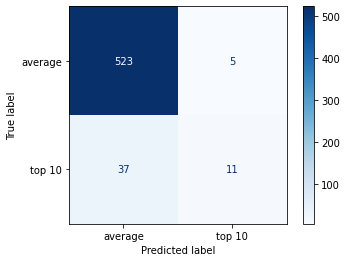

[(0.2752329713593419, 'song_popularity'),
 (0.06671946079820044, 'danceability'),
 (0.06307350374025933, 'valence'),
 (0.060300916392830105, 'artist followers'),
 (0.058438610342431335, 'artist popularity'),
 (0.05386007139283261, 'duration_ms'),
 (0.052991622148499465, 'speechiness'),
 (0.05279964908414771, 'liveness'),
 (0.05164024777071229, 'acousticness'),
 (0.0505534108718187, 'loudness'),
 (0.04957649349321102, 'energy'),
 (0.04622737197910897, 'tempo'),
 (0.02989132747852663, 'key'),
 (0.024635217899766457, 'instrumentalness'),
 (0.009036151390969588, 'mode'),
 (0.007877022226080728, 'pop'),
 (0.007699165472621905, 'hiphop'),
 (0.006319310348424678, 'rap'),
 (0.006002254441886017, 'rnb'),
 (0.006001086015674851, 'explicit'),
 (0.0059874839488178065, 'rock'),
 (0.004154928835333884, 'time_signature'),
 (0.00350132574522381, 'soul'),
 (0.0030676606725275387, 'country'),
 (0.002881020317110307, 'edm'),
 (0.001531715833641924, 'house'),
 (0.0, 'jazz')]

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)

#train model
rf = rf.fit(X_train, y_train)

#test model
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}\n")

predictions = rf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, display_labels=["average","top 10"])
plt.show()

feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

### K Nearest Neighbors

k: 1, Train/Test Score: 1.000/0.863
k: 3, Train/Test Score: 0.931/0.913
k: 5, Train/Test Score: 0.922/0.920
k: 7, Train/Test Score: 0.916/0.922
k: 9, Train/Test Score: 0.915/0.918
k: 11, Train/Test Score: 0.913/0.917
k: 13, Train/Test Score: 0.913/0.917
k: 15, Train/Test Score: 0.913/0.917
k: 17, Train/Test Score: 0.913/0.917
k: 19, Train/Test Score: 0.913/0.917


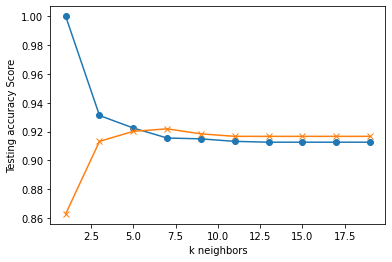

In [30]:
# PART 1

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Training Data Score: 0.9224537037037037
Testing Data Score: 0.9201388888888888

              precision    recall  f1-score   support

    negative       0.92      1.00      0.96       528
    positive       0.00      0.00      0.00        48

    accuracy                           0.92       576
   macro avg       0.46      0.50      0.48       576
weighted avg       0.84      0.92      0.88       576



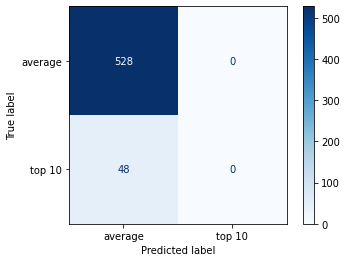

[(0.2752329713593419, 'song_popularity'),
 (0.06671946079820044, 'danceability'),
 (0.06307350374025933, 'valence'),
 (0.060300916392830105, 'artist followers'),
 (0.058438610342431335, 'artist popularity'),
 (0.05386007139283261, 'duration_ms'),
 (0.052991622148499465, 'speechiness'),
 (0.05279964908414771, 'liveness'),
 (0.05164024777071229, 'acousticness'),
 (0.0505534108718187, 'loudness'),
 (0.04957649349321102, 'energy'),
 (0.04622737197910897, 'tempo'),
 (0.02989132747852663, 'key'),
 (0.024635217899766457, 'instrumentalness'),
 (0.009036151390969588, 'mode'),
 (0.007877022226080728, 'pop'),
 (0.007699165472621905, 'hiphop'),
 (0.006319310348424678, 'rap'),
 (0.006002254441886017, 'rnb'),
 (0.006001086015674851, 'explicit'),
 (0.0059874839488178065, 'rock'),
 (0.004154928835333884, 'time_signature'),
 (0.00350132574522381, 'soul'),
 (0.0030676606725275387, 'country'),
 (0.002881020317110307, 'edm'),
 (0.001531715833641924, 'house'),
 (0.0, 'jazz')]

In [31]:
# PART 2

# Note that k: 5 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

#test model
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}\n")

predictions = knn.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, display_labels=["average","top 10"])
plt.show()

feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

### SVM

Training Data Score: 0.5578703703703703
Testing Data Score: 0.5434027777777778

              precision    recall  f1-score   support

    negative       0.97      0.52      0.67       528
    positive       0.14      0.83      0.23        48

    accuracy                           0.54       576
   macro avg       0.55      0.68      0.45       576
weighted avg       0.90      0.54      0.64       576



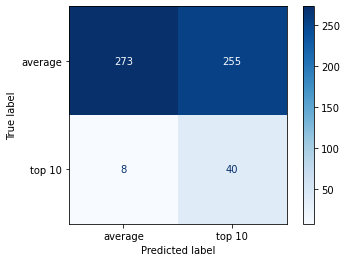

In [32]:
from sklearn.svm import SVC 

model = SVC(kernel='linear', class_weight='balanced')

### Just so that this thing can run...
X_prime = X.drop(['artist popularity', 'artist followers'], axis=1)
X_prime_train, X_prime_test, y_train, y_test = train_test_split(X_prime, y, random_state=42)

#train model
model.fit(X_prime_train, y_train)

#test model
print(f"Training Data Score: {model.score(X_prime_train, y_train)}")
print(f"Testing Data Score: {model.score(X_prime_test, y_test)}\n")

# Calculate classification report
target_names = ["negative", "positive"]

predictions = model.predict(X_prime_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

plot_confusion_matrix(model, X_prime_test, y_test, cmap=plt.cm.Blues, display_labels=["average","top 10"])
plt.show()

# feature_names = X_prime.columns
# sorted(zip(model.feature_importances_, feature_names), reverse=True)

In [ ]:
# #Gridsearch

# # Create the GridSearch estimator along with a parameter object containing the values to adjust
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [1, 5, 10],
#               'gamma': [0.0001, 0.001, 0.01]}
# grid = GridSearchCV(model, param_grid, verbose=3)

# # Fit the model using the grid search estimator. 
# # This will take the SVC model and try each combination of parameters
# grid.fit(X_train, y_train)

# # List the best parameters for this dataset
# print(grid.best_params_)

# # List the best score
# print(grid.best_score_)

# # Make predictions with the hypertuned model
# predictions = grid.predict(X_test)

# # Calculate classification report
# from sklearn.metrics import classification_report
# print(classification_report(y_test, predictions,
#                             target_names=target_names))